In [28]:
import tensorflow as tf
import numpy as np

X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [29]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [30]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [31]:
W = {'oculta': tf.Variable(tf.random_normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'), 
     'saida': tf.Variable(tf.random_normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [32]:
type(W)

dict

In [33]:
type(W['oculta'])

tensorflow.python.ops.variables.RefVariable

In [34]:
W['oculta']

<tf.Variable 'w_oculta_2:0' shape=(2, 3) dtype=float32_ref>

In [35]:
W['saida']

<tf.Variable 'w_saida_2:0' shape=(3, 1) dtype=float32_ref>

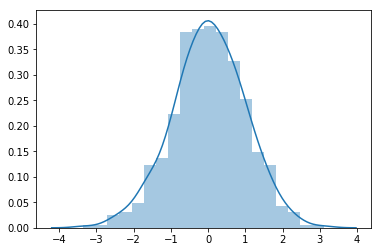

In [36]:
distribuicao = np.random.normal(size = 500)
#distribuicao
import seaborn as sns
%matplotlib inline
sns.distplot(distribuicao)

In [37]:
b = {'oculta': tf.Variable(tf.random_normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random_normal([neuronios_saida]), name = 'b_saida')}

In [38]:
xph = tf.placeholder(tf.float32, [4, neuronios_entrada], name = 'xph')
yph = tf.placeholder(tf.float32, [4, neuronios_saida], name = 'yph')

In [39]:
camada_oculta = tf.add(tf.matmul(xph, W['oculta']), b['oculta'])
camada_oculta_ativacao = tf.sigmoid(camada_oculta)
camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
camada_saida_ativacao = tf.sigmoid(camada_saida)
erro = tf.losses.mean_squared_error(yph, camada_saida_ativacao)
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.3).minimize(erro)

In [40]:
init = tf.global_variables_initializer()

In [41]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(W['oculta']))
    #print(sess.run(W['saida']))
    #print(sess.run(b['oculta']))
    #print('\n')
    #print(sess.run(b['saida']))
    #print(sess.run(camada_oculta, feed_dict = {xph: X}))
    #print(sess.run(camada_oculta_ativacao, feed_dict = {xph: X}))
    #print(sess.run(camada_saida, feed_dict = {xph: X}))
    #print(sess.run(camada_saida_ativacao, feed_dict = {xph: X}))
    for epocas in range(10000):
        erro_medio = 0
        _, custo = sess.run([otimizador, erro], feed_dict = {xph: X, yph: y})
        if epocas % 200 == 0:
            #print(custo)
            erro_medio += custo / 4
            print(erro_medio)
    W_final, b_final = sess.run([W, b])
            

0.07701308280229568
0.06483888626098633
0.062322068959474564
0.06092039868235588
0.05843648687005043
0.054685819894075394
0.04989248886704445
0.043891556560993195
0.03544321656227112
0.024680862203240395
0.015253676101565361
0.009485100395977497
0.006343666464090347
0.004566853400319815
0.003484062384814024
0.0027764635160565376
0.002286690752953291
0.0019317074911668897
0.0016647209413349628
0.0014577925903722644
0.0012933964608237147
0.0011600697180256248
0.0010500377975404263
0.000957873766310513
0.0008796752081252635
0.0008125832537189126
0.0007544537074863911
0.0007036508759483695
0.0006589089171029627
0.0006192302098497748
0.0005838230717927217
0.0005520517006516457
0.0005233937408775091
0.000497426837682724
0.00047379470197483897
0.0004522048693615943
0.0004324096371419728
0.00041419832268729806
0.00039739219937473536
0.0003818392287939787
0.0003674048057291657
0.0003539769968483597
0.0003414561797399074
0.00032975414069369435
0.0003187951515428722
0.0003085133503191173
0.000298

In [42]:
W_final

{'oculta': array([[ 4.581804 ,  5.933054 ,  3.4264722],
        [-4.2462645, -5.893248 , -3.4115555]], dtype=float32),
 'saida': array([[ 5.5926766],
        [-8.819599 ],
        [ 3.738357 ]], dtype=float32)}

In [43]:
b_final

{'oculta': array([ 2.0908842, -3.224524 ,  1.7616227], dtype=float32),
 'saida': array([-4.447132], dtype=float32)}

In [44]:
# teste
camada_oculta_teste = tf.add(tf.matmul(xph, W_final['oculta']), b_final['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W_final['saida']), b_final['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [45]:
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(camada_saida_ativacao_teste, feed_dict = {xph: X}))

[[0.96718204]
 [0.03678815]
 [0.03190582]
 [0.97175807]]
